In [1]:
#Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

#libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

#set the limit for the number of displayed rows
pd.set_option("display.max_columns", 200)

#setting the precision of floating numbers to 5 decimal point
pd.set_option("display.float_format", lambda x:"%.5f" % x)

#To tune model,get different metric store,and split data
from sklearn.metrics import(
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    classification_report,
    precision_recall_curve)

from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

#To impute missing values
from sklearn.impute import SimpleImputer

#To help with model building
from sklearn.linear_model import LogisticRegression

#To build SVM model
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

#To supress warning
import warnings
warnings.filterwarnings("ignore")



In [2]:
churn = pd.read_csv("Bankchurners.csv")

In [3]:
#checking the number of rows and columns
churn.shape

(10127, 21)

In [4]:
data = churn.copy()

In [5]:
#the first five rows
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.00000,777,11914.00000,1.33500,1144,42,1.62500,0.06100
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.00000,864,7392.00000,1.54100,1291,33,3.71400,0.10500
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.00000,0,3418.00000,2.59400,1887,20,2.33300,0.00000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.00000,2517,796.00000,1.40500,1171,20,2.33300,0.76000
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.00000,0,4716.00000,2.17500,816,28,2.50000,0.00000


In [6]:
#the last five rows
data.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.00000,1851,2152.00000,0.70300,15476,117,0.85700,0.46200
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.00000,2186,2091.00000,0.80400,8764,69,0.68300,0.51100
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.00000,0,5409.00000,0.81900,10291,60,0.81800,0.00000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.00000,0,5281.00000,0.53500,8395,62,0.72200,0.00000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.00000,1961,8427.00000,0.70300,10294,61,0.64900,0.18900


In [7]:
#checking the data types in the columns of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [8]:
#checking for duplicate valus
data.duplicated().sum()

0

In [9]:
#checking for missing values
round(data.isnull().sum() / data.isnull().count() * 100, 2)

CLIENTNUM                   0.00000
Attrition_Flag              0.00000
Customer_Age                0.00000
Gender                      0.00000
Dependent_count             0.00000
Education_Level            15.00000
Marital_Status              7.40000
Income_Category             0.00000
Card_Category               0.00000
Months_on_book              0.00000
Total_Relationship_Count    0.00000
Months_Inactive_12_mon      0.00000
Contacts_Count_12_mon       0.00000
Credit_Limit                0.00000
Total_Revolving_Bal         0.00000
Avg_Open_To_Buy             0.00000
Total_Amt_Chng_Q4_Q1        0.00000
Total_Trans_Amt             0.00000
Total_Trans_Ct              0.00000
Total_Ct_Chng_Q4_Q1         0.00000
Avg_Utilization_Ratio       0.00000
dtype: float64

* Education has 15% missing values
* Marital Status has 7% missing values

In [10]:
#The statistical summary of the numericla columns of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.00000,739177606.33366,36903783.45023,708082083.00000,713036770.50000,717926358.00000,773143533.00000,828343083.00000
Customer_Age,10127.00000,46.32596,8.01681,26.00000,41.00000,46.00000,52.00000,73.00000
Dependent_count,10127.00000,2.34620,1.29891,0.00000,1.00000,2.00000,3.00000,5.00000
Months_on_book,10127.00000,35.92841,7.98642,13.00000,31.00000,36.00000,40.00000,56.00000
Total_Relationship_Count,10127.00000,3.81258,1.55441,1.00000,3.00000,4.00000,5.00000,6.00000
Months_Inactive_12_mon,10127.00000,2.34117,1.01062,0.00000,2.00000,2.00000,3.00000,6.00000
Contacts_Count_12_mon,10127.00000,2.45532,1.10623,0.00000,2.00000,2.00000,3.00000,6.00000
Credit_Limit,10127.00000,8631.95370,9088.77665,1438.30000,2555.00000,4549.00000,11067.50000,34516.00000
Total_Revolving_Bal,10127.00000,1162.81406,814.98734,0.00000,359.00000,1276.00000,1784.00000,2517.00000
Avg_Open_To_Buy,10127.00000,7469.13964,9090.68532,3.00000,1324.50000,3474.00000,9859.00000,34516.00000


In [11]:
data.describe(include  =["object"]).T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,8608,6,Graduate,3128
Marital_Status,9378,3,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


In [12]:
for i in data.describe(include = ["object"]).columns:
    print("Unique values in", i ,"are : ")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in Attrition_Flag are : 
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
**************************************************
Unique values in Gender are : 
F    5358
M    4769
Name: Gender, dtype: int64
**************************************************
Unique values in Education_Level are : 
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
**************************************************
Unique values in Marital_Status are : 
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
**************************************************
Unique values in Income_Category are : 
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64
*********************************************

Data pre-processing

In [13]:
#CLIENTNUM consist of unique ID for client and hence will not add value to the modeling
data.drop(['CLIENTNUM'], axis = 1, inplace = True)

In [16]:
#Encoding Existing and Attrited customers to 0 and 1, for analysis
data["Attrition_Flag"].replace("Existing Customer", 0, inplace=True)
data["Attrition_Flag"].replace('Attrited Customer', 1, inplace = True)

EDA
Univariate Analysis

Exploring these variables in some more depth by observing their distributions

In [4]:
#Creating numerical columns
num_col = ['Customer_Age', 'Months_on_book', 'Credit_Limit', 'Total_Revolving_Bal','Avg_Open_To_Buy','Total_Trans_Ct','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']

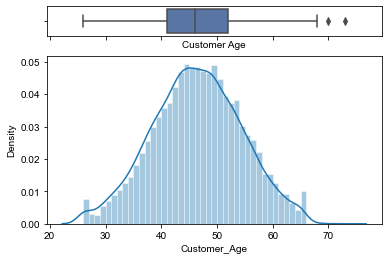

In [22]:
#Cut the windows in 2 part
f, (ax_box, ax_hist) = plt.subplots(2, sharex = True, gridspec_kw = {"height_ratios":(.15, .85)})
sns.set(style = "darkgrid")

#Add a garph in each part
sns.boxplot(data['Customer_Age'], ax=ax_box)
sns.distplot(data['Customer_Age'], ax=ax_hist)
ax_box.set(xlabel = "Customer Age")
plt.show()

Observation On Months_on_books

In [ ]:
f, (ax_box, ax_hist) = plt.subplots()